<a href="https://colab.research.google.com/github/PaulToronto/Hands-on-Maching-Learning-Book/blob/main/1_The_Machine_Learning_Landscape.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Machine Learning Landscape

https://github.com/ageron/

https://github.com/ageron/data

https://colab.research.google.com/github/ageron/handson-ml3/blob/main/index.ipynb

## Imports

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

## Machine Learning Applications

https://en.wikipedia.org/wiki/Machine_learning#Applications

## What Is Machine Learning?

*\[Machine learning is the\] field of study that gives computers the ability to learn without being explicitly programmed.*

Arthur Samuel, 1959

*A computer program is said to learn from experience E with respect to some task T and some performance measure P, if its performance on T, as measured by P, improves with experience E.*

Tom Mitchell, 1997

## Life Satisfaction Example

In [2]:
lifesat_data = 'https://raw.githubusercontent.com/ageron/data/main/lifesat/lifesat.csv'

lifesat = pd.read_csv(lifesat_data)
lifesat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               27 non-null     object 
 1   GDP per capita (USD)  27 non-null     float64
 2   Life satisfaction     27 non-null     float64
dtypes: float64(2), object(1)
memory usage: 780.0+ bytes


In [3]:
lifesat.shape

(27, 3)

In [4]:
lifesat.sort_values('Life satisfaction').head()

,Country,GDP per capita (USD),Life satisfaction
1,Greece,27287.083401,5.4
5,Portugal,32181.154537,5.4
2,Turkey,28384.987785,5.5
4,Hungary,31007.768407,5.6
7,Estonia,35638.421351,5.7


### Visualize the Data

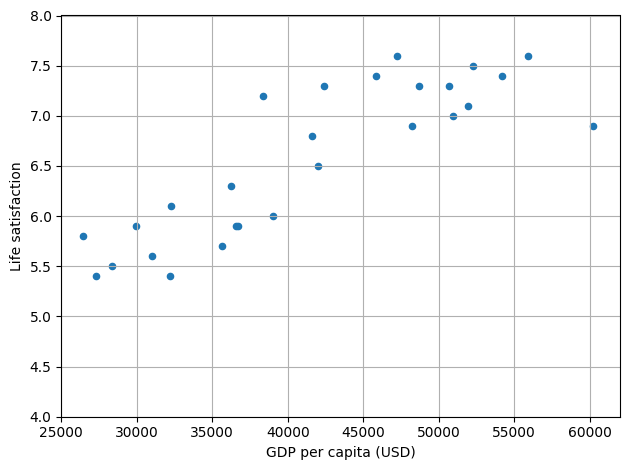

In [5]:
lifesat.plot(kind='scatter',
             x='GDP per capita (USD)',
             y='Life satisfaction',
             grid=True)
plt.axis([25_000, 62_000, 4, 8])
plt.tight_layout()
plt.show()

### Two Regression Models

In [6]:
X = lifesat[['GDP per capita (USD)']]
y = lifesat['Life satisfaction']

#### `LinearRegression()`

In [7]:
# select a model
lr_model = LinearRegression()
# train the model
lr_model.fit(X, y)

LinearRegression()

In [8]:
lr_model.coef_

array([6.77889969e-05])

In [9]:
lr_model.intercept_

3.7490494273769093

#### `KNeighborsRegressor(n_neighbors=3)`

In [10]:
# select a model
kn_model = KNeighborsRegressor(n_neighbors=3)
# train the model
kn_model.fit(X, y)

KNeighborsRegressor(n_neighbors=3)

#### Visualize the fit of each model

Includes the prediction for Cyprus which has a gdp of `$37,655.20 USD`

In [11]:
cyprus_gdp = [[37655.2]]

In [12]:
lr_fitted = lr_model.predict(X)
lr_fitted

array([5.54250143, 5.59881344, 5.67323928, 5.77814317, 5.85103495,
       5.93057761, 5.93444177, 6.16494226, 6.20405829, 6.22658399,
       6.23907722, 6.34816821, 6.39228805, 6.57091077, 6.59792388,
       6.62360074, 6.85762408, 6.95281169, 7.01715921, 7.05022695,
       7.18482109, 7.201025  , 7.26971192, 7.29303981, 7.42386138,
       7.54104476, 7.83236904])

In [13]:
lr_cyprus_prediction = lr_model.predict(cyprus_gdp)
lr_cyprus_prediction

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([6.30165767])

In [14]:
# this is one way to avoid the above error
lr_cyprus_prediction = lr_model.predict(pd.DataFrame({'GDP per capita (USD)':
                                                      cyprus_gdp[0]}))
lr_cyprus_prediction

array([6.30165767])

In [15]:
kn_fitted = kn_model.predict(X)
kn_fitted

array([5.56666667, 5.56666667, 5.6       , 5.66666667, 5.63333333,
       5.7       , 5.7       , 5.96666667, 6.03333333, 6.03333333,
       6.03333333, 6.36666667, 6.36666667, 6.86666667, 6.86666667,
       6.86666667, 7.3       , 7.3       , 7.26666667, 7.26666667,
       7.13333333, 7.13333333, 7.2       , 7.2       , 7.5       ,
       7.5       , 7.3       ])

In [16]:
kn_cyprus_prediction = kn_model.predict(pd.DataFrame({'GDP per capita (USD)':
                                                      cyprus_gdp[0]}))
kn_cyprus_prediction

array([6.33333333])

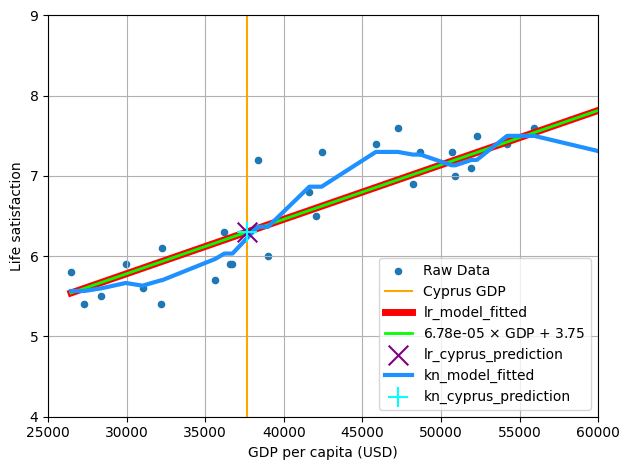

In [17]:
# plot the data
ax = lifesat.plot(kind='scatter',
                  x='GDP per capita (USD)',
                  y='Life satisfaction',
                  grid=True,
                  label='Raw Data')

# vertical orange line for the Cyprus GDP
ax.axvline(cyprus_gdp, color='orange', label='Cyprus GDP')

# plot lr_fitted
plt.plot(X,
         lr_fitted,
         color='red',
         linewidth=5,
         label='lr_model_fitted')

# plot using lr_model.coef_ and lr_model.intercept_
plt.plot(X,
         lr_model.coef_ * X + lr_model.intercept_,
         color='lime',
         linewidth=2,
         label=rf'{lr_model.coef_[0].round(7)} $\times$ GDP + {lr_model.intercept_.round(2)}')

# plot the lr_cyprus_prediction
plt.scatter(cyprus_gdp,
            lr_cyprus_prediction,
            color='purple',
            marker='x',
            s=200,
            label='lr_cyprus_prediction',
            zorder=100)

# plot kn_fitted
plt.plot(X,
         kn_fitted,
         color='dodgerblue',
         linewidth=3,
         label='kn_model_fitted')

# plot the kn_cyprus_prediction
plt.scatter(cyprus_gdp,
            lr_cyprus_prediction,
            color='cyan',
            marker='+',
            s=200,
            label='kn_cyprus_prediction',
            zorder=101)

plt.axis([25_000, 60_000, 4, 9])
plt.tight_layout()
plt.legend()
plt.show()

## Some Terminology

- ***Model*** : the part of a machine learning system that learns and makes predictions
- ***Supervised learning*** : the training set includes categorical labels or numeric targets
    - includes:
        - **classification**: labels are the *classes*
        - **regression**: sometimes the term *target* is used instead of *label*
- ***Unsupervised learning*** : there are no labels
    - includes:
        - **clustering**
        - **visualization algorithms**
        - **dimensionality reduction**
        - **anomaly detection** and **novelty detection**
        - **association rule learning**: example, customers who buy BBQ sauce and potato chips also tend to buy steak
- ***Semi-supervised learning***
    - used when only some of the data has labels
    - example: Google photos recognizes that there are distinct individuals in a set of photos, person A, person B, etc. Once the end user tags one of the photos with person A the identity of that person is known in the rest of the photos with person A
- ***Self-supervised learning***: starts with fully unlabeled dataset, then uses generated labels
- ***Transfer learning*** : transferring knowledge from one task to another
- ***Reinforcment learning***: an **agent** can observe the environment, select and perform actions and get **rewards** (or **penalties**). It must then learn by itself what is the best strategy, called a **policy** to get the most reward over time. A policy defines what action the agent should choose in a given situation. The policy gets updated as part of the learning process.
- ***Batch learning*** : the system is incapable of learning incrementally. It must be trained using all the available data. The system is trained and when launched ir runs without learning anymore. This is also called **offline learning**. A model's performance tends to decay over time. This is called **model rot** or **data drift**. The solution is to regularly retrain the model on up-to-date data.
- ***Online learning*** :
    - this is the opposite of batch learning. The system is trained incrementally. It is trained with either individually or in small groups called **mini-batches**.
    - an important parameter of online learning is the **learning rate**
        - a high learning rate adapts to new data quickly, but also tends to forget old data quickly
        - a low learning rate adapt to new data slowly, but is also less sensitive to noise in the new data
        - the model's performance could decline quickly if fed bad data, so it is important to monitor these systems closely. An anomaly detection algorithm could help with this
- ***Instance-based learning*** : the system learns the examples by heart, then, using a similarity measure, classifies new examples
- ***Model-based learning*** : uses a model to make predictions
- ***Feature selection*** : selecting the most useful features to train on among existing features
- ***Feature extraction*** : combining existing features to produce a more useful one
    - example: dimensionality reduction
- ***Hyperparameter*** : a parameter of the learning algorithm (not of the model)
    - must be set prior to training and remains constant during training
- ***Overfitting*** : the model performs well on the training data but does not generalize well
    - happens when the model is too complex relative to the amount of noisiness of the training data
    - possible solutions:
        - simplify the model
            - select one with fewer parameters (linear model rather than a high-degree polynomial model)
            - reduce the number of features from the training data
            - constrain the model (regularization, reduce degrees of freedom)
        - gather more training data
        - reduce the noise in the training data
            - fix data errors, remove outliers
- ***Underfitting*** : occurs when the model is too simple to learn the underlying structure of the data
    - possible solutions:
        - select a more powerful model with more parameters
        - feed better features to the learning algorithm (feature engineering)
        - reduce the constraints on the model
- ***Regularization*** : constraining a model to maker it simpler and reduce the risk of overfitting
    - example: reduce the degrees of freedom by setting the slope to 0 and only let the the intercept vary, meaning the line can only move up or down. That might be too much, maybe instead of setting the slope to 0, just restrain it to keep it small. In that case it will have somewhere between 1 and 2 degrees of freedom.
    - the amount of regularization can be controlled by a hyperparameter.
    - if you set the hyperparameter to a very large value, you will get a very flat model (a slope close to 0)

## Testing and Validating

- training set
- test set
    - The error rate on new cases is called the ***generalization error*** or the ***out-of-sample error***
    - evaluating your model on the test set gives an estimate of this error
    - this value tells you how well your model will perform on instances it has never seen before
- if the training error is low, but the generalization is high, it means your model is overfitting on the training data

## Hyperparameter Tuning and Model Selection

- validation set (or development set or dev set)
  - train multiple models with various hyperprameters on the reduced training set (training set minus validation set)
  - select the model that performs best on the validation set
  - then train the model on the full training set (including the validation set)
    - evaluate this model on the test set to get an estimate of the generalization error
- cross-validation
  - perform repeated cross-validation using many small validation sets
  - each model is evaluated once per validation after it is trained on the rest of the data
  - by averaging out all the evaluations of a model, you get a much more accurate measure of its performance
- a **train-dev set** is used when there is a risk of mismatch between the training data and the data used in the validation and test sets
